
## 🔧 Reliability Analysis of a Low-Voltage Induction Motor (Exponential Model)

This notebook demonstrates a simple **reliability and maintenance example** using the **Exponential Reliability Model**. It describes the random failure phase of a **low-voltage induction motor** operating under stable load conditions, assuming a **constant failure rate**.

<img src="Motor.png" alt="Low-voltage Indusction Motor" width="400">

### ⚙️ System Description

- **System:** 7.5 kW, 400 V induction motor  
- **Environment:** steady-state load, filtered air, balanced supply  
- **Failure Mechanism:** random shocks (voltage spikes, insulation stress)  
- **Model Type:** Exponential (constant hazard rate)


### 📘 Given Parameters

| Symbol | Description | Value |
|:--|:--|:--|
| $\lambda$ | Failure rate | $5 \times 10^{-4}$ failures/hour |
| MTTF | Mean Time To Failure | $1/\lambda = 2000$ hours |
| $t$ | Mission time | 1000 hours |


### 🧮 Exponential Reliability Model Functions

| Function | Formula | Physical Meaning |
|:--|:--|:--|
| **Probability Density Function (PDF)** | $f(t) = \lambda e^{-\lambda t}$ | Likelihood of failure at exact time $t$ |
| **Cumulative Distribution Function (CDF)** | $F(t) = 1 - e^{-\lambda t}$ | Probability that failure occurs by or before $t$ |
| **Survival Function (SF)** | $R(t) = e^{-\lambda t}$ | Probability the system survives beyond $t$ |
| **Hazard Function (HF)** | $h(t) = \lambda$ | Instantaneous failure rate (constant) |
| **Cumulative Hazard Function (CHF)** | $H(t) = \lambda t$ | Total accumulated risk of failure up to $t$ |

---


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lam = 5e-4  # failure rate (per hour)
t = 1000    # time (hours)

# Derived metrics
MTTF = 1 / lam
f_t = lam * np.exp(-lam * t)          # PDF
F_t = 1 - np.exp(-lam * t)            # CDF
R_t = np.exp(-lam * t)                # Survival
h_t = lam                             # Hazard (constant)
H_t = lam * t                         # Cumulative Hazard

# Print results
print("Exponential Reliability Model Results:")
print(f"Failure rate (lambda): {lam:.6f} per hour")
print(f"Mean Time To Failure (MTTF): {MTTF:.1f} hours")
print(f"PDF f(1000): {f_t:.6e}")
print(f"CDF F(1000): {F_t:.4f}")
print(f"Survival R(1000): {R_t:.4f}")
print(f"Hazard h(t): {h_t:.6f}")
print(f"Cumulative Hazard H(1000): {H_t:.4f}")

Exponential Reliability Model Results:
Failure rate (lambda): 0.000500 per hour
Mean Time To Failure (MTTF): 2000.0 hours
PDF f(1000): 3.032653e-04
CDF F(1000): 0.3935
Survival R(1000): 0.6065
Hazard h(t): 0.000500
Cumulative Hazard H(1000): 0.5000


---

#### 🧠 Interpretation of Results

- **PDF ($f(t)$):** Indicates how dense failures are around time $t=1000$ hours.  
  → Small value means failures are relatively spread out (low clustering).

- **CDF ($F(t)$):** Fraction of motors expected to fail by 1000 h.  
  → Here, about 39% of identical motors would have failed.

- **SF ($R(t)$):** Probability that a motor survives beyond 1000 h.  
  → About 61% remain operational after 1000 h.

- **HF ($h(t)$):** Constant failure rate — no aging effect.  
  → Each hour, the motor faces the same risk of failure.

- **CHF ($H(t)$):** Linear increase in accumulated risk.  
  → After 1000 h, the cumulative risk is 1.0 (dimensionless).

---

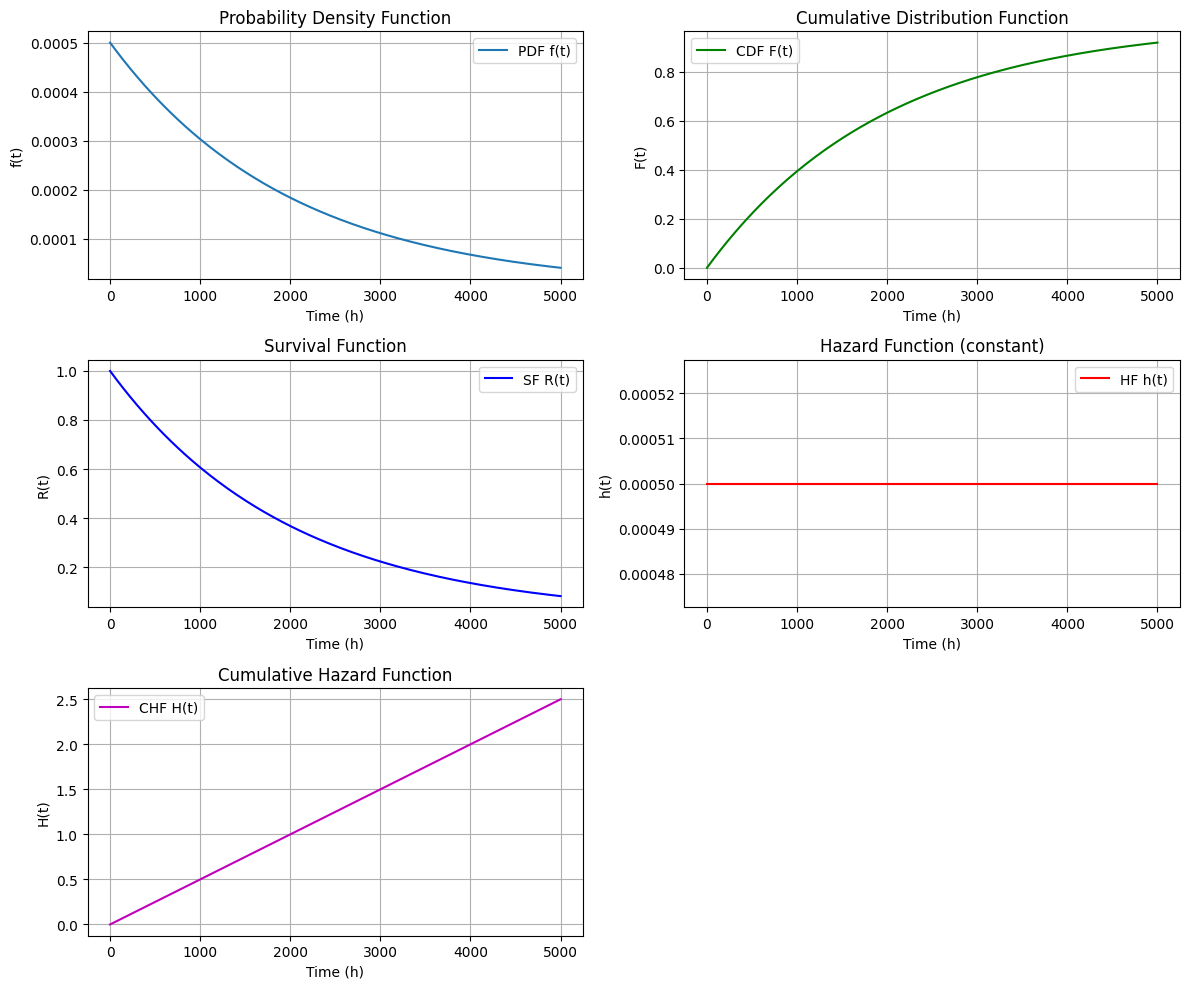

In [3]:
# Plotting all reliability functions over time

time = np.linspace(0, 5000, 200)

pdf = lam * np.exp(-lam * time)
cdf = 1 - np.exp(-lam * time)
sf = np.exp(-lam * time)
hf = np.full_like(time, lam)
chf = lam * time

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

axs[0].plot(time, pdf, label='PDF f(t)')
axs[0].set_title('Probability Density Function')
axs[0].set_xlabel('Time (h)')
axs[0].set_ylabel('f(t)')

axs[1].plot(time, cdf, 'g', label='CDF F(t)')
axs[1].set_title('Cumulative Distribution Function')
axs[1].set_xlabel('Time (h)')
axs[1].set_ylabel('F(t)')

axs[2].plot(time, sf, 'b', label='SF R(t)')
axs[2].set_title('Survival Function')
axs[2].set_xlabel('Time (h)')
axs[2].set_ylabel('R(t)')

axs[3].plot(time, hf, 'r', label='HF h(t)')
axs[3].set_title('Hazard Function (constant)')
axs[3].set_xlabel('Time (h)')
axs[3].set_ylabel('h(t)')

axs[4].plot(time, chf, 'm', label='CHF H(t)')
axs[4].set_title('Cumulative Hazard Function')
axs[4].set_xlabel('Time (h)')
axs[4].set_ylabel('H(t)')

# Hide unused subplot
axs[5].axis('off')

for ax in axs[:-1]:
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()



---

#### ⚙️ Physical Meaning (Induction Motor Context)

- The **Exponential model** is appropriate for the **useful life phase**, where failures are random and independent of age.  
- **PDF** and **CDF** describe when failures are likely to occur.  
- **Survival** ($R(t)$) gives reliability directly — a key maintenance indicator.  
- **Hazard** ($h(t)$) being constant means no aging; preventive replacement adds little benefit.  
- **CHF** shows cumulative exposure to risk — useful for visual diagnostics and comparing models.  

---

#### 🧩 Maintenance Implications

- **Run-to-failure** or **condition-based** maintenance is suitable.  
- Focus resources on **monitoring power quality** and **insulation health**, not on fixed-interval replacements.  
- If later data show increasing hazard, switch to a **Weibull** or **Lognormal** model.

---
